# The Basics : Training your first Neural Network

1. We will use TensorFlow framewok
2. Keras(API) is integrated into tf
3. Train with given data
4. Improve the model with added data

Converting ceslsius to fahrenheit,
$f=c*1.8+32

Input(celsius)= (0,8,15,22,38)
output(fahrenheit)=(46,59,72,100,?)

In [1]:
import tensorflow as tf #tensorflow is google framework that will speed up the execution speed

In [2]:
tf.__version__ #version of the tensorflow

'2.9.2'

In [3]:
import numpy as np
import logging 
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

# Setting Up Training Data

In [120]:
celsius_q    = np.array([102.5,103,101,105,110,105,-40, -10,  0,  8, 15, 22,  38,45,55,60,70,55,76,87.8,226.8,65,86,76],  dtype=float)
fahrenheit_a = np.array([216.5,217.4,213.8,221,230,221,-40,  14, 32, 46, 59, 72, 100,113,131,140,158,131,168.8,190.04,440.24,149,186.8,168.8],  dtype=float)
for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

102.5 degrees Celsius = 216.5 degrees Fahrenheit
103.0 degrees Celsius = 217.4 degrees Fahrenheit
101.0 degrees Celsius = 213.8 degrees Fahrenheit
105.0 degrees Celsius = 221.0 degrees Fahrenheit
110.0 degrees Celsius = 230.0 degrees Fahrenheit
105.0 degrees Celsius = 221.0 degrees Fahrenheit
-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit
45.0 degrees Celsius = 113.0 degrees Fahrenheit
55.0 degrees Celsius = 131.0 degrees Fahrenheit
60.0 degrees Celsius = 140.0 degrees Fahrenheit
70.0 degrees Celsius = 158.0 degrees Fahrenheit
55.0 degrees Celsius = 131.0 degrees Fahrenheit
76.0 degrees Celsius = 168.8 degrees Fahrenheit
87.8 degrees Celsius = 190.04 degrees Fahrenheit
226.8 degrees Celsius = 440.24 degrees

ML Terminology


Feature= Input of our model(Celsius.)

Label- Output our model(Fahrenheit)

Example-A pair of input/output  value 

# Creating the Model
 Using Dense Network.THis is simple problem so there will be single layer with single neuron.

 # Build a Layer

 We'll call the layer and create it by intantiating tf.keras.layers.
 Dense with the following

 * Input_shape[1]=this specifies input to this layer is single value.the shape is one dimensional array with one member

 * Units[1]= number of neurons in the layer.the number of neuron defines how many internal variables the layer has to try to learn how to solve the problem.Since this is the final layer,it is laso the model output-a single float value representing fahrenheit.

In [121]:
l0=tf.keras.layers.Dense(units=1,input_shape=[1])

# Assemble layers into the model
Sequential layers takes a list of argument specifying calculation order from input to output means how it is transforming from input to output.

In [122]:
#We have only one layer l0
model=tf.keras.Sequential([l0]) #defining the model

In [123]:
# Another way of making model
#model=tf.keras.Sequential(tf.keras.layers.Dense(units=1,input_shape=[1])

Compiling the model with loss and optimizer function

. Loss Function- its way of measuring the deviation or loss means how far is your predicted value from actual value.

. Optimizer Function- Adjusting weights and bias to reduce the loss so that the model will be generalized.

In [124]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1)) #0.1 is learning rate
              # range is usually 0.001 and 0.1

After compilation of model now model will be put for fit. first calculate the loss at each point then improving the loss.During the training optimizer function is used to calculate the adjustments to the models internal variable to internal variable until the model 

In [128]:
# Training the model
history=model.fit(celsius_q,fahrenheit_a,epochs=840,verbose=False)
print("Finished training the model")



Finished training the model


# Displaying training Steps


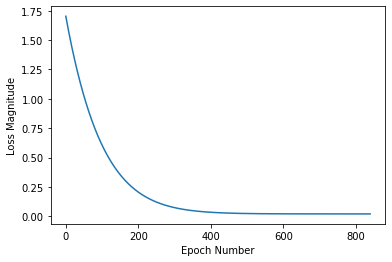

In [129]:
import matplotlib.pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Using model for prediction

In [130]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 28ms/step
[[211.99161]]


Looking at the layers weights

In [131]:
print("these are the layers variables:{}".format(l0.get_weights()))

these are the layers variables:[array([[1.8002931]], dtype=float32), array([31.962292], dtype=float32)]


We can see that the neural network takes weights 1.8 and 31.96 which is exactly the same.

# Making Multiple Layers

In [133]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1]) # Layer1
l1 = tf.keras.layers.Dense(units=4) #layer 2
l2 = tf.keras.layers.Dense(units=1) # layer 3
model = tf.keras.Sequential([l0, l1, l2]) # defining the model
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1)) # optimizer adam will adjust weight and bias so that the loss will be reduced.
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False) # fitting the model
print("Finished training the model")
print(model.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))


Finished training the model
1/1 [==============================] - 0s 56ms/step
[[211.99196]]
1/1 [==============================] - 0s 29ms/step
Model predicts that 100 degrees Celsius is: [[211.99196]] degrees Fahrenheit
These are the l0 variables: [array([[-0.67779535, -0.15292515, -0.46212128, -0.45729804]],
      dtype=float32), array([-5.1076207,  1.6839345, -4.8149223, -5.101531 ], dtype=float32)]
These are the l1 variables: [array([[-0.25898814,  0.8674963 ,  1.0070459 ,  0.12949072],
       [ 0.97182393,  0.17781612,  0.01236966,  0.41615075],
       [-0.8526549 ,  0.08185916,  0.14686981, -0.8777571 ],
       [-1.0230205 ,  0.35076576,  0.40742713, -0.00860707]],
      dtype=float32), array([ 4.813195 , -3.782227 , -4.775313 ,  2.0175886], dtype=float32)]
These are the l2 variables: [array([[ 0.6529518 ],
       [-0.7418787 ],
       [-0.58935326],
       [ 0.24507307]], dtype=float32), array([4.2870455], dtype=float32)]
